# Inferencia estadística en python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Función para la distribución de probabilidad empírica

def ecdf (data):
    "Función para la distribución de probabilidad empírica"
    x = np.sort(data)
    n = len(data)
    y = np.arange(1,n+1)/n
    
    return x, y


# Se crea una función para unir dos conjuntos de datos y permutarlos en una muestra

def permutation_sample(data1, data2):
    """Genera una muestra permutada de dos conjuntos de datos"""

    # Concatena los conjuntos en una variable llamada data
    data = np.concatenate((data1,data2))

    # Permuta el arreglo en una variable llamada permuted_data
    permuted_data = np.random.permutation(data)

    # Particiona el arreglo en dos muestras: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### Inferencia estadística

Inicialmente se desea comparar si dos conjuntos siguen la misma distribución de datos. En este caso se desea comparar si el ataque de dos generaciones de pokemon siguen la misma distribución

In [3]:
# Importar datos

df = pd.read_csv("Pokemon.csv",index_col=0)
G_2 = df[df.Generation ==2].copy() # Se seleccionan los pokemon de la generación 2
G_5 = df[df.Generation ==5].copy() # Se seleccionan los pokemon de la generación 5

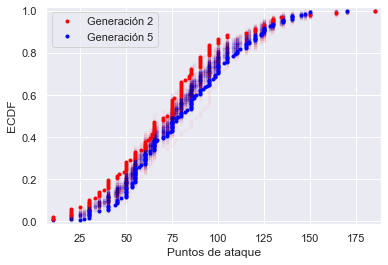

In [4]:
Attack_2 = G_2.Attack
Attack_5 = G_5.Attack

for i in range(50):
    
    # Generar muestras permutadas
    perm_sample_1, perm_sample_2 = permutation_sample(Attack_2,Attack_5)


    # Computar la distribución acumulada empírica
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Gráficar las distribuciones acumuladas para ambas muestras
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Gráficar las distribuciones acumuladas para los datos originales

x_1, y_1 = ecdf(Attack_2)
x_2, y_2 = ecdf(Attack_5)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label= "Generación 2")
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label= "Generación 5")

# Asignar nombre a los ejes, ajustar el margen y leyenda para las generaciones

plt.margins(0.02)
_ = plt.xlabel('Puntos de ataque')
_ = plt.ylabel('ECDF')
plt.legend()
plt.show()

## Pruebas de hipótesis